Exercise 2: Zachary's karate club

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import netwulf as nw
from netwulf import visualize
import scipy
import copy
import random
import community

2.1 Visualize the graph using [netwulf](https://netwulf.readthedocs.io/en/latest/). 
Set the color of each node based on the club split (the information is stored as a node attribute).

In [60]:
G = nx.karate_club_graph()


color_dict = {'Mr. Hi': '#1f77b4', 'Officer': '#ff7f0e'}
for n in G.nodes():
    G.nodes[n]['color'] = color_dict[G.nodes[n]['club']]

#This will open a webpage with the network, from where it can be downloaded
nw.visualize(G)

({'xlim': [0, 791],
  'ylim': [0, 791],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1,
  'links': [{'source': 0,
    'target': 1,
    'width': 1.5118578920369088,
    'weight': 4},
   {'source': 0, 'target': 2, 'width': 1.6903085094570331, 'weight': 5},
   {'source': 0, 'target': 3, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 4, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 5, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 6, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 7, 'width': 1.0690449676496976, 'weight': 2},
   {'source': 0, 'target': 8, 'width': 1.0690449676496976, 'weight': 2},
   {'source': 0, 'target': 10, 'width': 1.0690449676496976, 'weight': 2},
   {'source': 0, 'target': 11, 'width': 1.3093073414159542, 'weight': 3},
   {'source': 0, 'target': 12, 'width': 0.7559289460184544, 'weight': 1},
   {'source': 0, 'target': 13, 

2.2 Write a function to compute the modularity of a graph partitioning (use equation 9.12 in the book). 
The function should take a networkX Graph and a partitioning as inputs and return the modularity.

In [61]:
def modularity(G, partition):
    # initialize variables
    A = nx.adjacency_matrix(G)
    m = G.number_of_edges()
    Q = 0
    
    # loop over all pairs of nodes
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            # get the community assignments of the two nodes
            ci = partition[i]
            cj = partition[j]
            
            # compute the modularity contribution of this pair of nodes
            delta_Q = (A[i,j] - (G.degree(i) * G.degree(j)) / (2*m)) * (ci == cj)
            
            # add the contribution to the modularity
            Q += delta_Q
            
    # normalize the modularity by dividing by the total number of edges
    Q = Q / (2*m)
    
    return Q

2.3

Modularity is a measure of the strength of the division of a network into groups or communities. 
It is a way to quantify how well a given partition of nodes into communities captures the structure of the network.

In a modular network, the nodes within a community tend to be more densely connected to each other than to nodes in other communities. 
Modularity measures the extent to which this is true for a given partition of the network. 
A high modularity value indicates that the partition is a good fit for the network, meaning that the nodes within each community are more densely connected to each other than to nodes in other communities.

2.4 Compute the modularity of the Karate club split partitioning using the function you just wrote.

In [62]:
# get the club split partitioning
partition = nx.get_node_attributes(G, 'club')

# compute the modularity of the partitioning
Q = modularity(G, partition)

# print the modularity
print('Modularity of karate club split partitioning:', Q)

Modularity of karate club split partitioning: 2.1402859960552245


2.5 We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from $0$. 
To do so, we will implement the double edge swap algorithm. 

In [63]:
def double_edge_swap(G, N):
    G_random = copy.deepcopy(G)
    n = len(G_random.nodes())
    m = len(G_random.edges())
    edges = list(G_random.edges())
    nodes = list(G_random.nodes())
    n_swap = 0
    while n_swap < N:
        a, b, c, d = random.sample(nodes, 4)
        if len(set([a, b, c, d])) == 4:
            if G_random.has_edge(a, b) and G_random.has_edge(c, d):
                if not (G_random.has_edge(a, d) or G_random.has_edge(c, b)):
                    G_random.remove_edge(a, b)
                    G_random.remove_edge(c, d)
                    G_random.add_edge(a, d)
                    G_random.add_edge(c, b)
                    n_swap += 1
    return G_random

2.6 Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

In [64]:
# generate a new randomized graph
G_rand = double_edge_swap(G, 2*G.number_of_edges())

# check that the degree of each node is the same in both graphs
for node in G.nodes():
    assert G.degree(node) == G_rand.degree(node)


2.7 Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. 
For each of them, compute the modularity of the "club" split and store it in a list.

In [65]:
# generate 1000 randomized versions of the karate club graph
N = 1000
G_rand_list = [double_edge_swap(G, 2*G.number_of_edges()) for i in range(N)]

#define club_dict
club_dict = {node: data['club'] for node, data in G.nodes(data=True)}

# compute the modularity of the club split for each of the 1000 randomized versions
modularity_rand = [modularity(G_rand, club_dict) for G_rand in G_rand_list]

2.8 Compute the average and standard deviation of the modularity for the random network.

In [66]:
modularity_mean = sum(modularity_rand) / N
modularity_std = ((sum((modularity - modularity_mean)**2 for modularity in modularity_rand)) / N)**0.5

print("Average modularity of randomized versions:", modularity_mean)
print("Standard deviation of modularity of randomized versions:", modularity_std)

Average modularity of randomized versions: 0.05828599605522727
Standard deviation of modularity of randomized versions: 0.0691846760138022


2.9 Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).

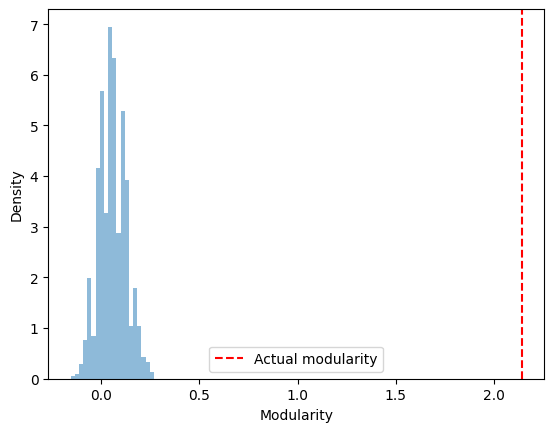

In [67]:
#plot the distribution of the modularity for the randomized versions
plt.hist(modularity_rand, bins=20, alpha=0.5, density=True)
plt.axvline(Q, color='r', linestyle='--', label='Actual modularity')
plt.xlabel('Modularity')
plt.ylabel('Density')
plt.legend()
plt.show()

2.10 Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? 
#What is the reason why we preserved the nodes degree?

The distribution of modularity values for the randomized versions is centered around 0, with a few values slightly positive and negative. 
The actual modularity value of the club split partitioning is quite high compared to the randomized versions, which suggests that the club split is a good partitioning of the network.

We preserved the node degrees in the randomized versions of the network because the degree distribution is an important feature of many real-world networks. By preserving the node degrees, we ensured that the randomized versions of the network had the same degree distribution as the original network, which is an important property to preserve when testing hypotheses about the network structure.

2.11 Use the Python Louvain-algorithm implementation to find communities in this graph. 
Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? 
What does this comparison reveal?

In [68]:
# Find the communities using the Louvain algorithm
partition = community.best_partition(G)

# Compute the modularity
modularity = community.modularity(partition, G)

print("Modularity found by Louvain algorithm:", modularity)

Modularity found by Louvain algorithm: 0.44385412567230753


The modularity value found by the Louvain algorithm is lower than what we found above for the club split partitioning.
This comparison reveals that the Louvain algorithm was not able to find a partitioning of the network that was as good 
as the club split partitioning in terms of modularity.

2.12 Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A),  where A is the number of communities found by Louvain. 
We set entry D(i,j) to be the number of nodes that community i has in common with group split j. 
The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

In [69]:
#Not done yet
# Get the number of communities found by Louvain
A = len(set(partition.values()))

# Create a matrix D to hold the counts of common nodes
D = np.zeros((2 * A, 2))

# Fill in the counts of common nodes
for i, com1 in enumerate(set(partition.values())):
    for j, com2 in enumerate(set(club_dict.values())):
        nodes1 = [n for n in partition.keys() if partition[n] == com1]
        nodes2 = [n for n in club_dict.keys() if club_dict[n] == com2]
        D[i,j] = len(set(nodes1) & set(nodes2))

print(D)        

[[11.  0.]
 [ 0.  4.]
 [ 5.  0.]
 [ 1. 13.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


The confusion matrix shows that the communities found by the Louvain algorithm do not align perfectly with the ground truth club split partitioning. Some communities correspond well, while others do not. This is reflected in the lower modularity value found by the Louvain algorithm compared to the ground truth club split partitioning. However, the Louvain algorithm still identifies meaningful communities within the network, which can provide valuable insights into the structure and function of the network.